In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('../data/final_DE.csv')
pd.set_option('display.max_columns',25)
df

,Unnamed: 0,GU,DONG_CODE,DONG,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
0,0,종로구,1111010100,청운동,0,0,0,0,0,0,0,0,0,2,0,2,8,0,12,0,1,0
1,1,종로구,1111010200,신교동,0,0,0,0,0,0,0,0,0,5,2,0,1,0,14,0,0,0
2,2,종로구,1111010300,궁정동,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,3,종로구,1111010400,효자동,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0
4,4,종로구,1111010500,창성동,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,강동구,1174010700,암사동,1,1,0,2,0,30,4,16,8,197,10,11,70,4,133,11,33,0
463,463,강동구,1174010900,천호동,1,4,0,3,1,70,6,14,7,124,8,15,131,17,266,12,68,1
464,464,강동구,1174010800,성내동,4,4,0,2,0,50,2,30,14,190,16,18,143,20,156,12,58,0
465,465,강동구,1174010500,길동,0,2,0,1,0,20,1,18,9,100,16,9,63,10,119,10,38,0


In [3]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.set_index('index',inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GU               467 non-null    object
 1   DONG_CODE        467 non-null    int64 
 2   DONG             467 non-null    object
 3   SUBWAY_NUM       467 non-null    int64 
 4   STARBUCKS_NUM    467 non-null    int64 
 5   SPORT_NUM        467 non-null    int64 
 6   SAFE_DLVR_NUM    467 non-null    int64 
 7   MC_NUM           467 non-null    int64 
 8   KINDER_NUM       467 non-null    int64 
 9   KIDS_NUM         467 non-null    int64 
 10  GYM_NUM          467 non-null    int64 
 11  GOLF_NUM         467 non-null    int64 
 12  ACADEMY_NUM      467 non-null    int64 
 13  ANIMAL_HSPT_NUM  467 non-null    int64 
 14  BIKE_NUM         467 non-null    int64 
 15  CAFE             467 non-null    int64 
 16  CAR_SHR_NUM      467 non-null    int64 
 17  CCTV_NUM         467 non-null    in

In [5]:
df.describe()

,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
count,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1.131524e+09,0.554604,1.201285,0.152034,0.567452,0.186296,19.721627,0.473233,6.794433,3.310493,52.668094,3.811563,5.950749,34.650964,3.770878,48.897216,13.066381,12.451820,0.057816
std,1.992829e+07,1.105349,2.525016,0.786427,1.234887,0.483177,38.257761,1.106376,13.548535,7.546135,124.718890,6.655118,8.810337,56.393393,6.340226,89.451177,27.919986,21.510436,0.267876
min,1.111010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.114013e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,1.000000,0.000000
50%,1.126010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,0.000000,2.000000,14.000000,1.000000,14.000000,3.000000,3.000000,0.000000
75%,1.150010e+09,1.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,7.000000,3.000000,57.500000,4.000000,8.000000,38.000000,5.000000,51.500000,12.000000,14.000000,0.000000
max,1.174011e+09,7.000000,25.000000,12.000000,10.000000,4.000000,220.000000,7.000000,120.000000,67.000000,1620.000000,42.000000,63.000000,503.000000,40.000000,734.000000,256.000000,162.000000,3.000000


In [62]:
data = df[col].values

In [102]:
area_df = pd.read_csv('../data/AREA_DONG.csv')
del(area_df['SI_DO'])
del(area_df['GU'])

In [24]:
area_df

,DONG,AREA
0,청운동,"797,032.5"
1,신교동,"99,144.0"
2,궁정동,"73,042.7"
3,효자동,"59,135.9"
4,창성동,"59,706.1"
...,...,...
462,둔촌동,"2,461,511.8"
463,암사동,"4,711,364.2"
464,성내동,"1,958,987.6"
465,천호동,"3,065,543.3"


In [94]:
population_df = pd.read_csv('../data/POPU_DONG.csv')
del(population_df['DONG_CODE'])
del(population_df['SI_DO'])
del(population_df['GU'])

In [95]:
population_df

,DONG,NUM_POPU
0,청운동,2330
1,신교동,1393
2,궁정동,179
3,효자동,572
4,창성동,439
...,...,...
462,둔촌동,24311
463,암사동,66490
464,성내동,65873
465,천호동,85928


In [101]:
population_df['idx'] = [i for i in range(467)]
population_df.set_index('idx',inplace=True)

,DONG,NUM_POPU,idx
0,청운동,2330,0
1,신교동,1393,1
2,궁정동,179,2
3,효자동,572,3
4,창성동,439,4
...,...,...,...
462,둔촌동,24311,462
463,암사동,66490,463
464,성내동,65873,464
465,천호동,85928,465


In [103]:
area_df['idx'] = [i for i in range(467)]
area_df.set_index('idx',inplace=True)

In [104]:
area_df

,DONG,AREA
idx,,
0,청운동,"797,032.5"
1,신교동,"99,144.0"
2,궁정동,"73,042.7"
3,효자동,"59,135.9"
4,창성동,"59,706.1"
...,...,...
462,둔촌동,"2,461,511.8"
463,암사동,"4,711,364.2"
464,성내동,"1,958,987.6"


In [108]:
density_df = pd.merge(area_df,population_df,how='outer',on='idx')

In [109]:
density_df

,idx,DONG_x,AREA,DONG_y,NUM_POPU
0,0,청운동,"797,032.5",청운동,2330
1,1,신교동,"99,144.0",신교동,1393
2,2,궁정동,"73,042.7",궁정동,179
3,3,효자동,"59,135.9",효자동,572
4,4,창성동,"59,706.1",창성동,439
...,...,...,...,...,...
462,462,둔촌동,"2,461,511.8",둔촌동,24311
463,463,암사동,"4,711,364.2",암사동,66490
464,464,성내동,"1,958,987.6",성내동,65873
465,465,천호동,"3,065,543.3",천호동,85928


In [ ]:
density_df['DONG_x'] == density_df['DONG_y']

In [37]:
population = density_df['NUM_POPU'].tolist()

In [48]:
for i in range(len(area)):
    area[i] = float(area[i].replace(',',''))
area

[3431874.4,
 408136.1,
 2516862.0,
 2464376.1,
 158099.4,
 224305.2,
 1936485.0,
 2267204.2,
 2925560.2,
 5424693.9,
 4785635.1,
 2391891.1,
 46356.7,
 57151.9,
 173819.1,
 4015814.2,
 2178411.7,
 765264.3,
 8236325.7,
 38723.9,
 2905994.7,
 2793612.9,
 60459.6,
 80572.8,
 73374.0,
 2394555.7,
 54267.7,
 56452.2,
 22303.9,
 29996.3,
 3710703.7,
 5286947.6,
 1381584.8,
 50065.7,
 2998695.6,
 734287.0,
 1823033.6,
 73042.7,
 34394.9,
 445038.1,
 305306.3,
 327902.0,
 802321.7,
 1611207.8,
 1233204.2,
 73125.3,
 1255362.3,
 19106.2,
 26561.4,
 33664.1,
 54834.8,
 229109.7,
 23091.8,
 72800.7,
 29185.7,
 65020.1,
 138532.1,
 10812.7,
 3268077.9,
 8266038.3,
 1649586.1,
 70392.5,
 52259.8,
 118251.3,
 307482.8,
 1467496.8,
 1789992.7,
 2717301.0,
 261803.6,
 56702.3,
 1102862.7,
 58770.1,
 1659884.5,
 827357.1,
 218011.4,
 161652.6,
 363251.0,
 295242.7,
 288791.6,
 167282.1,
 321574.0,
 43172.3,
 1996733.5,
 1530403.1,
 267478.5,
 848827.4,
 3791374.5,
 467231.1,
 605222.2,
 2037958.2,
 29

In [38]:
area = density_df['AREA'].tolist()

In [49]:
density = []
for i in range(len(density_df.index)):
    dense = population[i] / area[i]
    density.append(dense)
density

[0.02467281436639989,
 0.021899557525051083,
 0.009628259316561655,
 0.018052033534978692,
 0.006679342236592929,
 0.012639029322548028,
 0.0247851132335133,
 0.014516116369226909,
 0.02869740981573375,
 0.011365618251750573,
 0.0003527222541476261,
 0.021864289724561455,
 0.004918382887479048,
 0.004601771769617458,
 0.006167331438259662,
 0.011521947404837604,
 0.022035779554434084,
 0.03315717197313399,
 0.009523542761306781,
 5.164769044440255e-05,
 0.006208889506921674,
 0.0,
 0.0060205492593401215,
 0.002904205885857262,
 0.001512797448687546,
 0.01430662063947813,
 0.0073892941842016524,
 0.015499838801676463,
 0.027214971372719568,
 0.03007037534629271,
 0.00157598139673615,
 0.021990571648563342,
 0.02309087361123255,
 0.015180053409819498,
 0.02596195492466791,
 0.026525050831623057,
 0.007759593679458239,
 0.002450621348882229,
 0.004128519053696914,
 0.03371846140813562,
 0.03260004788633579,
 0.038017456435154404,
 0.017640056351461018,
 0.02798521705269798,
 0.04361889134

In [50]:
density_df['DENSITY'] = density
density_df

,AREA,NUM_POPU,DENSITY
DONG,,,
가락동,"3,431,874.4",84674,0.024673
가리봉동,"408,136.1",8938,0.021900
가산동,"2,516,862.0",24233,0.009628
가양동,"2,464,376.1",44487,0.018052
가회동,"158,099.4",1056,0.006679
...,...,...,...
후암동,"865,094.6",16377,0.018931
훈정동,"206,168.9",0,0.000000
휘경동,"1,684,153.6",37997,0.022561


In [53]:
col = df.columns[3:]
col

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM', 'MC_NUM',
       'KINDER_NUM', 'KIDS_NUM', 'GYM_NUM', 'GOLF_NUM', 'ACADEMY_NUM',
       'ANIMAL_HSPT_NUM', 'BIKE_NUM', 'CAFE', 'CAR_SHR_NUM', 'CCTV_NUM',
       'CHILD_MED_NUM', 'CON_NUM', 'DPTM_NUM'],
      dtype='object')

In [58]:
y = []
for c in col:
    x = df[c] / density[:467]
    y.append(x)
pd.DataFrame(y).T

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
index,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.060878,0.000000,81.060878,324.243513,0.000000,486.365269,0.000000,40.530439,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,228.315115,91.326046,0.000000,45.663023,0.000000,639.282323,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.860933,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.395421,276.977106,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.715341,0.000000,149.715341,449.146023,0.000000,0.000000,299.430682,149.715341,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,329.892105,329.892105,0.0,659.784211,0.000000,9896.763158,1319.568421,5278.273684,2639.136842,64988.744737,3298.921053,3628.813158,23092.447368,1319.568421,43875.650000,3628.813158,10886.439474,0.000000
463,103.384441,413.537762,0.0,310.153322,103.384441,7236.910839,620.306643,1447.382168,723.691084,12819.670629,827.075524,1550.766608,13543.361713,1757.535490,27500.261189,1240.613287,7030.141958,103.384441
464,451.821171,451.821171,0.0,225.910586,0.000000,5647.764640,225.910586,3388.658784,1581.374099,21461.505631,1807.284685,2033.195270,16152.606869,2259.105856,17621.025676,1355.463514,6551.406982,0.000000


In [89]:
df['pca_x'].unique()

array([-7.27548787e+01, -7.18061020e+01, -8.22573078e+01, -8.09614502e+01,
       -8.04339275e+01, -7.73233134e+01, -7.68625470e+01, -7.68718963e+01,
       -7.21485574e+01, -7.49713091e+01, -7.50476216e+01, -7.71277753e+01,
       -7.68950893e+01, -7.18343960e+01, -7.50794288e+01, -7.52941697e+01,
       -8.08850935e+01, -7.81062246e+01, -7.74397663e+01, -7.64637016e+01,
       -7.43892292e+01, -8.12739675e+01, -6.72971494e+01, -7.67257717e+01,
       -8.02595888e+01, -8.05461844e+01, -7.90302314e+01, -6.70635522e+01,
       -7.47120515e+01, -5.68632761e+01, -7.43765494e+01, -4.53508452e+01,
       -5.52688911e+01, -8.06656187e+01, -7.62884018e+01, -8.16625113e+01,
       -7.40242308e+01, -7.72138257e+01, -7.28701785e+01, -7.78468140e+01,
       -7.68632075e+01, -7.08013436e+01, -7.02803696e+01, -7.11583852e+01,
       -7.38557274e+01, -7.36802559e+01, -8.12624350e+01, -7.53623590e+01,
       -7.55438672e+01, -7.90971823e+01, -7.98561165e+01, -7.59471156e+01,
       -8.25698250e+01, -

In [93]:
df[df['pca_x'] == 0]

,GU,DONG_CODE,DONG,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,gmm_cluster_3,silhouette_coeff,pca_x,pca_y,spec_3
index,,,,,,,,,,,,,,,,,,,,,,,,,


In [92]:
df['pca_y'].unique()

array([ 8.40300951e+00,  9.97655168e+00,  1.78871558e+01,  1.71533925e+01,
        1.77678402e+01,  2.02434724e+01,  1.07542699e+01,  1.52648979e+01,
        6.42321148e+00,  9.64070813e+00,  1.02543021e+01,  1.47771384e+01,
        1.22160953e+01,  1.86414502e+01,  1.72911006e+01,  9.91515978e+00,
        1.70700285e+01,  1.55436909e+01,  1.72822680e+01,  1.40847973e+01,
        1.15939228e+01,  1.73320366e+01,  3.48206087e+00,  1.26600238e+01,
        1.67762129e+01,  1.64009470e+01,  1.55172133e+01,  1.78871558e+01,
        6.65102658e+00,  1.09475079e+01,  1.22894304e+01,  1.69165592e+01,
        1.12314926e+01,  1.65187488e+01,  1.53941550e+01,  1.44761721e+01,
        1.85373739e+01,  2.16187995e+01,  2.01350358e+01,  1.57735795e+01,
        1.38142242e+01,  1.26768329e+01,  1.17762216e+01, -6.14043147e-01,
        1.35391455e+01,  1.82502084e+01,  1.41135751e+01,  1.73308365e+01,
        1.60248021e+01,  1.26499062e+01,  1.60754347e+01,  1.75118373e+01,
        1.22515350e+01,  

In [63]:
# GMM 적용
from sklearn.mixture import GaussianMixture
# n_components로 미리 군집 개수 설정
gmm = GaussianMixture(n_components=10, n_init=3, random_state=0).fit(data)
# n_init : 모델 반복 횟수 -> 파라미터를 무작위로 선정하여 수렴할 때까지 학습
gmm_labels = gmm.predict(data)

In [64]:
# GMM 후 클러스터링 레이블을 따로 설정
df['gmm_cluster_3'] = gmm_labels

In [65]:
df['gmm_cluster_3'].value_counts()

0    273
9    111
5     34
1     18
3     13
4      6
6      5
8      4
2      2
7      1
Name: gmm_cluster_3, dtype: int64

In [66]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, df['gmm_cluster_3'])
df['silhouette_coeff']=score_samples

print()

average_score = silhouette_score(data, df['gmm_cluster_3'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.442


In [67]:
df.groupby('gmm_cluster_3')['silhouette_coeff'].mean()

gmm_cluster_3
0    0.791059
1    0.223497
2    0.508156
3    0.372496
4    0.172218
5   -0.272400
6    0.189435
7    0.000000
8    0.375424
9   -0.121459
Name: silhouette_coeff, dtype: float64

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주 성분의 갯수 : 2
pca_transformed = pca.fit_transform(data)
df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]

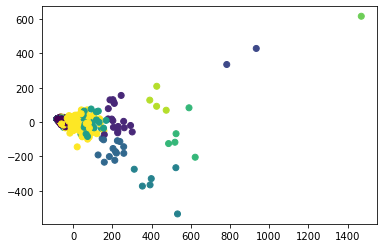

In [69]:
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['gmm_cluster_3'])

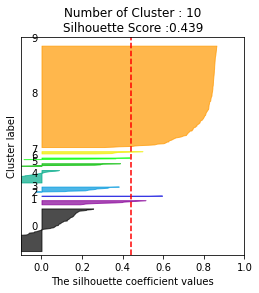

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = data
cluster = GaussianMixture(n_components=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")

In [71]:
best_n = 0
best_silhouette_score = 0

for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0).fit(data)
    gmm_labels = gmm.predict(data)
    
    score_samples = silhouette_samples(data, gmm_labels)
    average_score = silhouette_score(data, gmm_labels)
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
    print()
    
    if average_score > best_silhouette_score:
        best_n = i
        best_silhouette_score = average_score
print('best n :', best_n, 'best score :', best_silhouette_score)

Silhouette Analysis Score:0.544

Silhouette Analysis Score:0.531

Silhouette Analysis Score:0.526

Silhouette Analysis Score:0.524

Silhouette Analysis Score:0.511

Silhouette Analysis Score:0.460

Silhouette Analysis Score:0.419

Silhouette Analysis Score:0.369

Silhouette Analysis Score:0.442

Silhouette Analysis Score:0.426

Silhouette Analysis Score:0.390

Silhouette Analysis Score:0.390

Silhouette Analysis Score:0.380

Silhouette Analysis Score:0.379

Silhouette Analysis Score:0.382

Silhouette Analysis Score:0.382

Silhouette Analysis Score:0.341

Silhouette Analysis Score:0.336

Silhouette Analysis Score:0.273

best n : 2 best score : 0.5436823573601403


Silhouette Analysis Score:0.544

Silhouette Analysis Score:0.531

Silhouette Analysis Score:0.526

Silhouette Analysis Score:0.524

Silhouette Analysis Score:0.511

Silhouette Analysis Score:0.460

Silhouette Analysis Score:0.419

Silhouette Analysis Score:0.369

Silhouette Analysis Score:0.442

Silhouette Analysis Score:0.426

Silhouette Analysis Score:0.390

Silhouette Analysis Score:0.390

Silhouette Analysis Score:0.380

Silhouette Analysis Score:0.379

Silhouette Analysis Score:0.382

Silhouette Analysis Score:0.382

Silhouette Analysis Score:0.341

Silhouette Analysis Score:0.336

Silhouette Analysis Score:0.273

best n : 2 best score : 0.5436823573601403


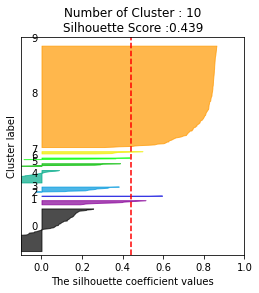

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

X_features = data
cluster = GaussianMixture(n_components=10, n_init=100, random_state=0)
cluster_labels = cluster.fit_predict(data)
sil_avg = silhouette_score(X_features,cluster_labels)
sil_values = silhouette_samples(X_features,cluster_labels)

y_lower = 10
fig, axs = plt.subplots(figsize=(4, 4), nrows=1, ncols=1)

axs.set_title('Number of Cluster : '+ str(10)+'\n' \
                  'Silhouette Score :' + str(round(sil_avg,3)) )
axs.set_xlabel("The silhouette coefficient values")
axs.set_ylabel("Cluster label")
axs.set_xlim([-0.1, 1])
axs.set_ylim([0, len(X_features) + (10 + 1) * 10])
axs.set_yticks([])  # Clear the yaxis labels / ticks
axs.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

for i in range(10):
    ith_cluster_sil_values = sil_values[cluster_labels==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    axs.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs.axvline(x=sil_avg, color="red", linestyle="--")

best_n = 0
best_silhouette_score = 0

for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10, random_state=0).fit(data)
    gmm_labels = gmm.predict(data)
    
    score_samples = silhouette_samples(data, gmm_labels)
    average_score = silhouette_score(data, gmm_labels)
    print('Silhouette Analysis Score:{0:.3f}'.format(average_score))
    print()
    
    if average_score > best_silhouette_score:
        best_n = i
        best_silhouette_score = average_score
print('best n :', best_n, 'best score :', best_silhouette_score)

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'SUBWAY_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'SPORT_NUM'}>,
        <AxesSubplot:title={'center':'SAFE_DLVR_NUM'}>],
       [<AxesSubplot:title={'center':'MC_NUM'}>,
        <AxesSubplot:title={'center':'KINDER_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>],
       [<AxesSubplot:title={'center':'ACADEMY_NUM'}>,
        <AxesSubplot:title={'center':'ANIMAL_HSPT_NUM'}>,
        <AxesSubplot:title={'center':'BIKE_NUM'}>,
        <AxesSubplot:title={'center':'CAFE'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>],
       [<AxesSubplot:title={'center':'CCTV_NUM'}>,
        <AxesSubplot:title={'center':'CHILD_MED_NUM'}>,
        <AxesSubplot:title={'center':'CON_NUM'}>,
        <AxesSubplot:title={'center':'DPTM_NUM'}>,
  

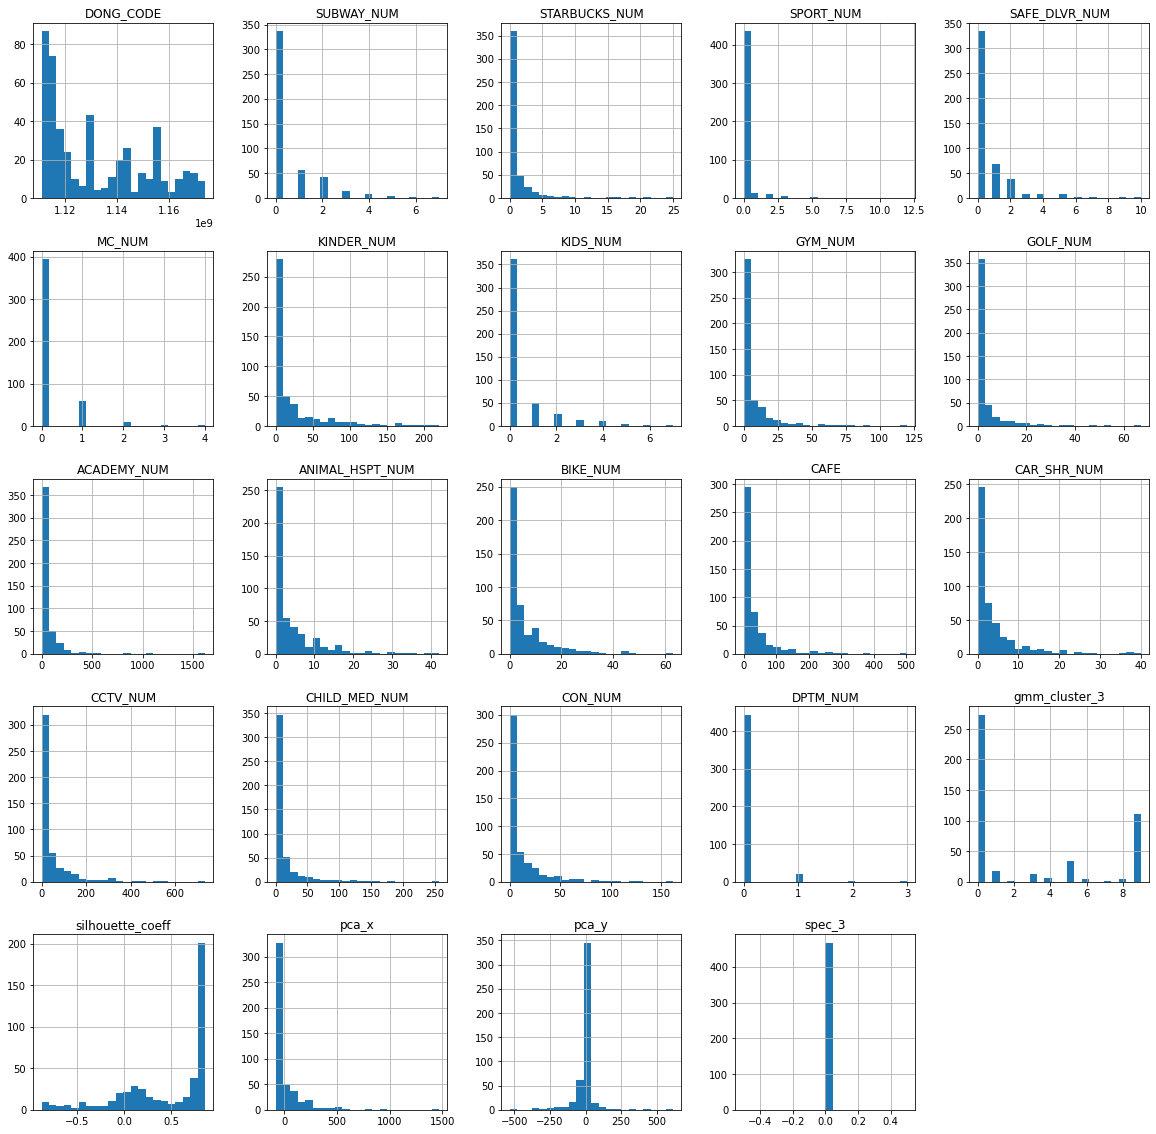

In [87]:
df.hist(figsize = (20, 20), bins = 22, legend = False)

In [78]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=10, n_init=3, random_state=0)

In [79]:
spectral_labels = spectral.fit_predict(data)

In [80]:
spectral_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
df['spec_3'] = spectral_labels

In [77]:
df['spec_3'].value_counts()

0    467
Name: spec_3, dtype: int64

In [15]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_samples = silhouette_samples(data, df['spec_3'])
df['sil_score_3']=score_samples

print()

average_score = silhouette_score(data, df['spec_3'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))


Silhouette Analysis Score:0.194
